## Generate data for a programming homework project for postdoc/SEA hire

In [57]:
import pandas as pd
import numpy as np
import os,sys, glob, shutil
%matplotlib inline

In [19]:
indir = 'G://Shared drives//BTO Topic 2  Integrating EE & DR//Task 2//Load_Shape_Data//lbnl-load-enduse-shapes//anonymized_1in2_actual_actual_2014'
outdir = 'G://My Drive/sdge_cluster_data/'

In [20]:
#Read cluster summary file
cs = pd.read_csv(glob.glob(os.path.join(indir,'*cluster_summary*'))[0], index_col=0)

In [21]:
cs.head()

cluster   kwh_ann_tot  customer_count  \
1     pge-com-PGCC-com_other-noKW-Care-0.0_1.0  1.742474e+06              49   
2  pge-com-PGCC-com_other-noKW-nonCare-0.0_0.1  4.170087e+05            1752   
3  pge-com-PGCC-com_other-noKW-nonCare-0.1_0.2  2.183825e+06            1752   
4  pge-com-PGCC-com_other-noKW-nonCare-0.2_0.3  4.622916e+06            1749   
5  pge-com-PGCC-com_other-noKW-nonCare-0.3_0.4  7.644292e+06            1752   

  util  slap sector building_type     care  kwh_bin kw_bin  \
1  pge  PGCC    com        office     Care  0.0_1.0   noKW   
2  pge  PGCC    com     com_other  nonCare  0.0_0.1   noKW   
3  pge  PGCC    com     com_other  nonCare  0.1_0.2   noKW   
4  pge  PGCC    com     com_other  nonCare  0.2_0.3   noKW   
5  pge  PGCC    com     com_other  nonCare  0.3_0.4   noKW   

   poolpump_penetration  hvac_penetration  weather_station  bev_count  \
1                   NaN          0.666667           724915        NaN   
2                   NaN          0.151515           724915        NaN   
3                   NaN          0.151899           724915        NaN   
4                   NaN          0.328571           724915        NaN   
5                   NaN          0.386667           724915        NaN   

   bev_work_count  phev_count  phev_work_count  battery_kwh_per_customer  \
1             NaN         NaN              NaN                       NaN   
2             NaN         NaN              NaN                       NaN   
3             NaN         NaN              NaN                       NaN   
4             NaN         NaN              NaN                       NaN   
5             NaN         NaN              NaN                       NaN   

                               cluster_oldname  
1     pge-com-PGCC-com_other-noKW-Care-0.0_1.0  
2  pge-com-PGCC-com_other-noKW-nonCare-0.0_0.1  
3  pge-com-PGCC-com_other-noKW-nonCare-0.1_0.2  
4  pge-com-PGCC-com_other-noKW-nonCare-0.2_0.3  
5  pge-com-PGCC-com_other-noKW-nonCare-0.3_0.4

In [111]:
#Cut down to SDGE
cs_sdge = cs.loc[cs['util']=='sdge', 
                 ['cluster', 'kwh_ann_tot', 'customer_count', 'util', 'sector', 'building_type', 'care',
                  'kwh_bin', 'kw_bin']]
cs_sdge.rename(columns={'care':'rate_class'}, inplace=True)
cs_sdge

cluster   kwh_ann_tot  \
2566    sdge-com-SDG1-com_other-noKW-Care-0.0_0.2  7.756975e+04   
2567    sdge-com-SDG1-com_other-noKW-Care-0.2_0.4  2.386990e+05   
2568    sdge-com-SDG1-com_other-noKW-Care-0.4_0.6  4.120847e+05   
2569    sdge-com-SDG1-com_other-noKW-Care-0.6_0.8  1.420902e+06   
2570    sdge-com-SDG1-com_other-noKW-Care-0.8_1.0  1.620293e+07   
...                                           ...           ...   
2762  sdge-res-SDG1-res_misc-noKW-nonCare-0.5_0.6  5.307001e+08   
2763  sdge-res-SDG1-res_misc-noKW-nonCare-0.6_0.7  6.197978e+08   
2764  sdge-res-SDG1-res_misc-noKW-nonCare-0.7_0.8  7.343816e+08   
2765  sdge-res-SDG1-res_misc-noKW-nonCare-0.8_0.9  9.138204e+08   
2766  sdge-res-SDG1-res_misc-noKW-nonCare-0.9_1.0  1.575237e+09   

      customer_count  util sector building_type rate_class  kwh_bin kw_bin  
2566              72  sdge    com     com_other       Care  0.0_0.2   noKW  
2567              71  sdge    com     com_other       Care  0.2_0.4   noKW  
2568              72  sdge    com     com_other       Care  0.4_0.6   noKW  
2569              71  sdge    com     com_other       Care  0.6_0.8   noKW  
2570              72  sdge    com     com_other       Care  0.8_1.0   noKW  
...              ...   ...    ...           ...        ...      ...    ...  
2762           96094  sdge    res      res_misc    nonCare  0.5_0.6   noKW  
2763           95950  sdge    res      res_misc    nonCare  0.6_0.7   noKW  
2764           96002  sdge    res      res_misc    nonCare  0.7_0.8   noKW  
2765           96011  sdge    res      res_misc    nonCare  0.8_0.9   noKW  
2766           96009  sdge    res      res_misc    nonCare  0.9_1.0   noKW  

[201 rows x 9 columns]

In [127]:
#Write out SDGE file
cs_sdge.to_csv(os.path.join(outdir,'cluster_summary.csv'), index=False)
len(cs_sdge)

201

In [130]:
#Sum up gross demand
copy=False
gross_dem=None
end_uses = []
i=0
for cn in cs_sdge['cluster']:
    i+=1
    file = os.path.join(indir,cn+'.csv')
    if copy: shutil.copyfile(os.path.join(indir,file), os.path.join(outdir,cn+'.csv'))
    c = pd.read_csv(file, index_col='hour_ending')
    for eu in c.columns:
        if eu not in end_uses:
            end_uses.append(eu)
    if gross_dem is None:
        gross_dem = c['total']
    else:
        gross_dem += c['total']
    
c.head()
print(i)

201


In [61]:
#Get end uses
end_uses

['total',
 'hvac',
 'lighting',
 'other',
 'process',
 'pumping',
 'cooling',
 'poolpump',
 'plugload']

In [131]:

gross_dem.head()

hour_ending
1.0    1.839072e+06
2.0    1.729853e+06
3.0    1.663662e+06
4.0    1.617637e+06
5.0    1.612213e+06
Name: total, dtype: float64

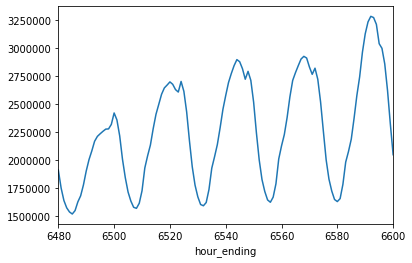

In [56]:
gross_dem.loc[270*24:275*24].plot()

(0, 4.67161408905069)

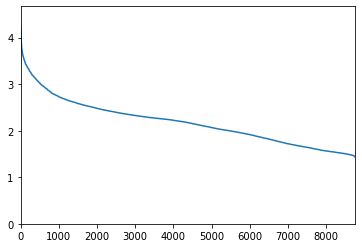

In [132]:
#Q2: load duration curve
ld_curve = gross_dem.div(1.e6).sort_values(ascending=False).reset_index()
ax = ld_curve['total'].plot()
ax.set_ylim([0,max(ld_curve['total'])*1.1])

In [133]:
#Q1: From the load duration curve, get the top ten hours of the year. 
#Max hourly consumption is 4.24 GWh
ld_curve.head(10)

hour_ending     total
0       6208.0  4.246922
1       6209.0  4.192789
2       6185.0  4.186095
3       6230.0  4.178371
4       6207.0  4.166802
5       6231.0  4.164798
6       6232.0  4.156159
7       6184.0  4.152928
8       6183.0  4.125961
9       6233.0  4.114116

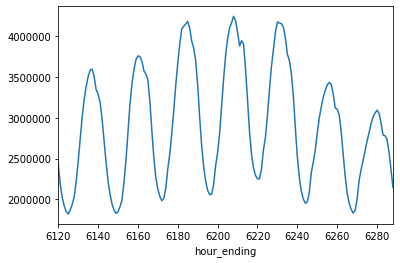

In [134]:
#Q2: Plot demand in the requested range
gross_dem.loc[255*24:262*24].plot()

In [135]:
#Get top ten hours
topten = ld_curve.loc[0:9, 'hour_ending']
topten

0    6208.0
1    6209.0
2    6185.0
3    6230.0
4    6207.0
5    6231.0
6    6232.0
7    6184.0
8    6183.0
9    6233.0
Name: hour_ending, dtype: float64

In [136]:
#Q3: top ten hours are all in three days in September, probably owing to a heat wave
pd.Series(pd.date_range(start='2014-01-01', end='2015-01-01', freq='H', closed='left').values)[topten]

hour_ending
6208.0   2014-09-16 16:00:00
6209.0   2014-09-16 17:00:00
6185.0   2014-09-15 17:00:00
6230.0   2014-09-17 14:00:00
6207.0   2014-09-16 15:00:00
6231.0   2014-09-17 15:00:00
6232.0   2014-09-17 16:00:00
6184.0   2014-09-15 16:00:00
6183.0   2014-09-15 15:00:00
6233.0   2014-09-17 17:00:00
dtype: datetime64[ns]

In [138]:
flex_end_uses = ['hvac', 'lighting', 'process', 'pumping', 'cooling', 'poolpump']

In [137]:
#Compute total potential flexible load by cluster and end use
dr_pot = pd.DataFrame(columns=flex_end_uses)
for cn in cs_sdge['cluster']:
    file = os.path.join(outdir,cn+'.csv')
    c = pd.read_csv(file, index_col='hour_ending')
    mean_peak_loads = c.loc[topten, flex_end_uses+['total']].mean().fillna(0)
    dr_pot.loc[cn,flex_end_uses] =  mean_peak_loads = mean_peak_loads[flex_end_uses]

    
    
dr_pot.head(20)

C:\Users\bgerke.DOMINO0\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


hvac     lighting  \
sdge-com-SDG1-com_other-noKW-Care-0.0_0.2         0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-Care-0.2_0.4         0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-Care-0.4_0.6         0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-Care-0.6_0.8         0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-Care-0.8_1.0         0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-nonCare-0.0_0.1      0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-nonCare-0.1_0.2      0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-nonCare-0.2_0.3      0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-nonCare-0.3_0.4      0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-nonCare-0.4_0.5      0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-nonCare-0.5_0.6      0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-nonCare-0.6_0.7      0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-nonCare-0.7_0.8      0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-nonCare-0.8_0.9      0.000000     0.000000   
sdge-com-SDG1-com_other-noKW-nonCare-0.9_1.0      0.000000     0.000000   
sdge-com-SDG1-office-50_200kW-nonCare-0.0_0.1   889.950573  1145.734646   
sdge-com-SDG1-office-50_200kW-nonCare-0.1_0.2  2446.640291  3074.857614   
sdge-com-SDG1-office-50_200kW-nonCare-0.2_0.3  3379.979055  4434.709616   
sdge-com-SDG1-office-50_200kW-nonCare-0.3_0.4  4286.175925  4991.438535   
sdge-com-SDG1-office-50_200kW-nonCare-0.4_0.5  4253.958826  4888.604892   

                                               process  pumping  cooling  \
sdge-com-SDG1-com_other-noKW-Care-0.0_0.2          0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-Care-0.2_0.4          0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-Care-0.4_0.6          0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-Care-0.6_0.8          0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-Care-0.8_1.0          0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-nonCare-0.0_0.1       0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-nonCare-0.1_0.2       0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-nonCare-0.2_0.3       0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-nonCare-0.3_0.4       0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-nonCare-0.4_0.5       0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-nonCare-0.5_0.6       0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-nonCare-0.6_0.7       0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-nonCare-0.7_0.8       0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-nonCare-0.8_0.9       0.0      0.0      0.0   
sdge-com-SDG1-com_other-noKW-nonCare-0.9_1.0       0.0      0.0      0.0   
sdge-com-SDG1-office-50_200kW-nonCare-0.0_0.1      0.0      0.0      0.0   
sdge-com-SDG1-office-50_200kW-nonCare-0.1_0.2      0.0      0.0      0.0   
sdge-com-SDG1-office-50_200kW-nonCare-0.2_0.3      0.0      0.0      0.0   
sdge-com-SDG1-office-50_200kW-nonCare-0.3_0.4      0.0      0.0      0.0   
sdge-com-SDG1-office-50_200kW-nonCare-0.4_0.5      0.0      0.0      0.0   

                                               poolpump  
sdge-com-SDG1-com_other-noKW-Care-0.0_0.2           0.0  
sdge-com-SDG1-com_other-noKW-Care-0.2_0.4           0.0  
sdge-com-SDG1-com_other-noKW-Care-0.4_0.6           0.0  
sdge-com-SDG1-com_other-noKW-Care-0.6_0.8           0.0  
sdge-com-SDG1-com_other-noKW-Care-0.8_1.0           0.0  
sdge-com-SDG1-com_other-noKW-nonCare-0.0_0.1        0.0  
sdge-com-SDG1-com_other-noKW-nonCare-0.1_0.2        0.0  
sdge-com-SDG1-com_other-noKW-nonCare-0.2_0.3        0.0  
sdge-com-SDG1-com_other-noKW-nonCare-0.3_0.4        0.0  
sdge-com-SDG1-com_other-noKW-nonCare-0.4_0.5        0.0  
sdge-com-SDG1-com_other-noKW-nonCare-0.5_0.6        0.0  
sdge-com-SDG1-com_other-noKW-nonCare-0.6_0.7        0.0  
sdge-com-SDG1-com_other-noKW-nonCare-0.7_0.8        0.0  
sdge-com-SDG1-com_other-noKW-nonCare-0.8_0.9        0.0  
sdge-com-SD

In [139]:
#Q4: biggest potential flexible end use is commercial lighting
dr_pot.sum().div(1e6)

hvac        0.348166
lighting    0.645824
process     0.104889
pumping     0.023177
cooling     0.100617
poolpump    0.074678
dtype: float64

In [143]:
#Q5: largest sector is commercial, with nearly a quarter of the load
com = dr_pot.index.str.contains('-com-')
print('com', dr_pot.loc[com].sum().sum()/(1.e6))
res = dr_pot.index.str.contains('-res-')
print('res', dr_pot.loc[res].sum().sum()/(1.e6))
ind = dr_pot.index.str.contains('-ind-')
print('ind', dr_pot.loc[ind].sum().sum()/(1.e6))

com 0.9939892154047317
res 0.17529494560763623
ind 0.12806554947929477


In [149]:
#Top five clusters: large offices (BY FAR), medium offices with high consumpiton, 
#medium retail with ihgh consumption, large res.
pot_by_cluster = dr_pot.sum(axis=1).sort_values(ascending=False)
pot_by_cluster.head(5)/1.e6

sdge-com-SDG1-office-gt200kW-nonCare-0.0_1.0    0.377112
sdge-com-SDG1-office-lt50kW-nonCare-0.9_1.0     0.097888
sdge-com-SDG1-office-lt50kW-nonCare-0.8_0.9     0.036919
sdge-com-SDG1-retail-lt50kW-nonCare-0.9_1.0     0.035682
sdge-res-SDG1-res_misc-noKW-nonCare-0.9_1.0     0.032691
dtype: float64

In [150]:
dr_pot.loc[pot_by_cluster.index].iloc[0:10]/1e6

hvac  lighting   process  \
sdge-com-SDG1-office-gt200kW-nonCare-0.0_1.0   0.147136  0.229975  0.000000   
sdge-com-SDG1-office-lt50kW-nonCare-0.9_1.0    0.042019  0.055869  0.000000   
sdge-com-SDG1-office-lt50kW-nonCare-0.8_0.9    0.015682  0.021237  0.000000   
sdge-com-SDG1-retail-lt50kW-nonCare-0.9_1.0    0.008646  0.027036  0.000000   
sdge-res-SDG1-res_misc-noKW-nonCare-0.9_1.0    0.000000  0.000000  0.000000   
sdge-com-SDG1-retail-gt200kW-nonCare-0.9_1.0   0.004482  0.019349  0.000000   
sdge-com-SDG1-office-50_200kW-nonCare-0.9_1.0  0.009548  0.014183  0.000000   
sdge-ind-SDG1-ind_other-noKW-nonCare-0.0_1.0   0.000000  0.000000  0.022683   
sdge-com-SDG1-office-lt50kW-nonCare-0.7_0.8    0.009232  0.013172  0.000000   
sdge-res-SDG1-res_misc-noKW-nonCare-0.8_0.9    0.000000  0.000000  0.000000   

                                               pumping   cooling  poolpump  
sdge-com-SDG1-office-gt200kW-nonCare-0.0_1.0       0.0  0.000000  0.000000  
sdge-com-SDG1-office-lt50kW-nonCare-0.9_1.0        0.0  0.000000  0.000000  
sdge-com-SDG1-office-lt50kW-nonCare-0.8_0.9        0.0  0.000000  0.000000  
sdge-com-SDG1-retail-lt50kW-nonCare-0.9_1.0        0.0  0.000000  0.000000  
sdge-res-SDG1-res_misc-noKW-nonCare-0.9_1.0        0.0  0.026997  0.005694  
sdge-com-SDG1-retail-gt200kW-nonCare-0.9_1.0       0.0  0.000000  0.000000  
sdge-com-SDG1-office-50_200kW-nonCare-0.9_1.0      0.0  0.000000  0.000000  
sdge-ind-SDG1-ind_other-noKW-nonCare-0.0_1.0       0.0  0.000000  0.000000  
sdge-com-SDG1-office-lt50kW-nonCare-0.7_0.8        0.0  0.000000  0.000000  
sdge-res-SDG1-res_misc-noKW-nonCare-0.8_0.9        0.0  0.016705  0.005694

In [165]:
#Add potential to cluster summary file
cs_sdge=cs_sdge.merge(pot_by_cluster.rename('pot'), left_on='cluster', right_index=True)#loc[cs_sdge['cluster'].isin(dr_pot.loc[pot_by_cluster.index].index.values[0:10])]

In [172]:
#Q7: I'd target the clusters with the most potential load per customer to minimize my
#acquisition costs. That means going after comp/elec manufacturers first, followed by large retail, then large office
cs_sdge['pot_per_customer'] = cs_sdge['pot']/cs_sdge['customer_count']
cs_sdge.sort_values('pot_per_customer', ascending=False)[['cluster','pot','customer_count','pot_per_customer']].head(10)

cluster            pot  \
2660  sdge-ind-SDG1-comp_elec-gt200kW-nonCare-0.66_1.0   19640.530567   
2635      sdge-com-SDG1-retail-gt200kW-nonCare-0.9_1.0   23831.858342   
2605      sdge-com-SDG1-office-gt200kW-nonCare-0.0_1.0  377111.506706   
2642    sdge-ind-SDG1-chemical-gt200kW-nonCare-0.0_1.0   10618.710120   
2634      sdge-com-SDG1-retail-gt200kW-nonCare-0.8_0.9   15544.602568   
2633      sdge-com-SDG1-retail-gt200kW-nonCare-0.7_0.8   13294.633869   
2632      sdge-com-SDG1-retail-gt200kW-nonCare-0.6_0.7   11973.920821   
2746      sdge-ind-SDG1-wwater-gt200kW-nonCare-0.0_1.0    8572.991265   
2631      sdge-com-SDG1-retail-gt200kW-nonCare-0.5_0.6   11083.632626   
2630      sdge-com-SDG1-retail-gt200kW-nonCare-0.4_0.5    9912.875104   

      customer_count  pot_per_customer  
2660              35        561.158016  
2635              44        541.633144  
2605             732        515.179654  
2642              29        366.162418  
2634              44        353.286422  
2633              44        302.150770  
2632              44        272.134564  
2746              34        252.146802  
2631              44        251.900741  
2630              44        225.292616